# Predicting if a pokemon is legendary!

## Hypothesis
Legendary pokemons tend to have better stats so we could predict if a pokemon is legendary or normal just from its stats

## Loading raw data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
raw_df = pd.read_csv("pokemons.csv")
raw_df.head(1)


,id,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
0,1,bulbasaur,ordinary,generation-i,nothing,grass,poison,45,49,49,65,65,45,318,7,69,overgrow chlorophyll,A strange seed was planted on its back at birt...


In [3]:
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1017 non-null   int64 
 1   name          1017 non-null   object
 2   rank          1017 non-null   object
 3   generation    1017 non-null   object
 4   evolves_from  1017 non-null   object
 5   type1         1017 non-null   object
 6   type2         519 non-null    object
 7   hp            1017 non-null   int64 
 8   atk           1017 non-null   int64 
 9   def           1017 non-null   int64 
 10  spatk         1017 non-null   int64 
 11  spdef         1017 non-null   int64 
 12  speed         1017 non-null   int64 
 13  total         1017 non-null   int64 
 14  height        1017 non-null   int64 
 15  weight        1017 non-null   int64 
 16  abilities     1017 non-null   object
 17  desc          1017 non-null   object
dtypes: int64(10), object(8)
memory usage: 143.1+ KB


In [4]:
legendary_no = raw_df[raw_df["rank"] == "legendary"]["id"].count()
normal_no = raw_df[raw_df["rank"] != "legendary"]["id"].count()
print(f"legendary no.: {legendary_no}, normal_no.: {normal_no}")


legendary no.: 69, normal_no.: 948


In [6]:
X = raw_df[["hp", "atk", "def", "spatk", "spdef", "speed"]]
y  = raw_df["rank"].apply(lambda x: 1 if x == "legendary" else 0)


### Dealing with imbalanced data
We have 69 legendary pokemons and 948 ordinary pokemons. This is a highly imabalanced dataset and we would have to
1. Split the datasets with stratification

2. Oversample Legendary pokemons with the SMOTE technique

In [8]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Original dataset class distribution:", Counter(y))

# Split the dataset into training and testing sets (8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print("Train dataset class distribution:", Counter(y_train))
print("Test dataset class distribution:", Counter(y_test))

# Apply SMOTE to the training data
sm = SMOTE(sampling_strategy=1, random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
print("Resampled train dataset class distribution:", Counter(y_train_resampled))


Original dataset class distribution: Counter({0: 948, 1: 69})
Train dataset class distribution: Counter({0: 758, 1: 55})
Test dataset class distribution: Counter({0: 190, 1: 14})
Resampled train dataset class distribution: Counter({1: 758, 0: 758})


<Axes: xlabel='hp', ylabel='speed'>

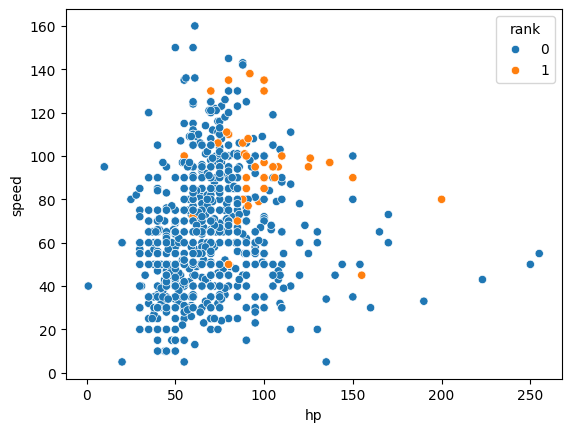

In [71]:
sns.scatterplot(data=X_train, x="hp", y="speed", hue=y_train)


<Axes: xlabel='hp', ylabel='speed'>

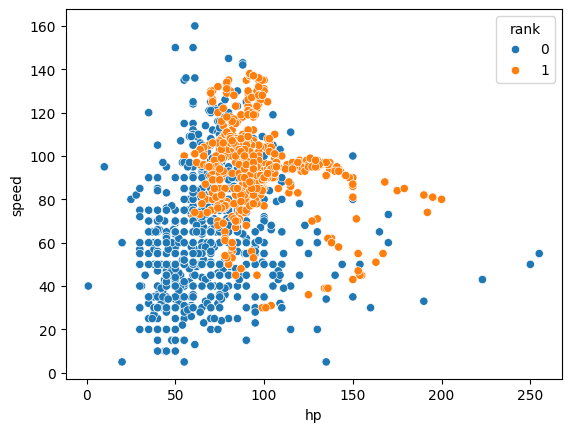

In [72]:
sns.scatterplot(data=X_train_resampled, x="hp", y="speed", hue=y_train_resampled)


By applying stratification and SMOTE, we managed to make a relatively balanced train dataset!

## Check for need of feature regularization

<Axes: ylabel='Count'>

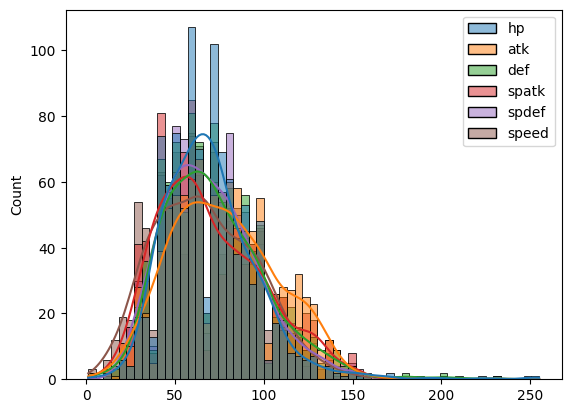

In [11]:
sns.histplot(data=X, kde=True)


The distribution on each stats are roughly similar. Hence, there is no need to regularize the features!

## Logistic regression with multiple variables

### Logistic Regression and Gradient Descent

One of the main topics of this course was applying logistic regression to a calssification task. And the algorithm to apply logistic regressiion was gradient descent

For logistic regression, the model is represented as

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

For logistic regression, the loss of one data point is defined as,
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
And, the average of each loss function is the cost function

The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously

### Regularized Logistic Regression

Regularized logistic regression penalizes the model when coeffiients in parameter *w* gets too huge.
**This will reduce overfitting (model with high variance)** 

For regularized logistic regression, the cost function is of the form
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

Compare this to the cost function without regularization (which you implemented above), which is of the form 

$$ J(\mathbf{w}.b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\right]$$

The difference is the regularization term, which is $$\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$ 
Note that the $b$ parameter is not regularized.

In [86]:
from sklearn.linear_model import LogisticRegression
# In sklearn, penalty of l2 is equivalent to the regularization method above, **ridge**
clf = LogisticRegression(penalty="l2", max_iter=100).fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test)
Counter(y_pred)


Counter({0: 177, 1: 27})

In [87]:
acc = clf.score(X_test,  y_test)
print(f"Global accuracy: {acc:.3f}")


Global accuracy: 0.907


In [90]:
from sklearn.metrics import classification_report
# Shows a report on our classification
print(classification_report(y_test, y_pred, target_names=["ordinary", "legendary"]))


              precision    recall  f1-score   support

    ordinary       0.98      0.92      0.95       190
   legendary       0.41      0.79      0.54        14

    accuracy                           0.91       204
   macro avg       0.70      0.85      0.74       204
weighted avg       0.94      0.91      0.92       204



$$Recall = \frac{TP}{TP + FN}, Precision = \frac{TP}{TP + FP}$$ 

In this case, 

Recall: How well the model could correctly identify a legendary pokemon, from an actual legendary pokemon

Precision: How well the model could distinguish a legendary pokemon from an ordinary pokemon

### Analysis
- A good number of ordiinary pokemons have similar stats to a legendary pokemon, so it is hard to distinguish a high-stat ordinary pokemon from a legendary pokemon -> Low precision and recall for legendary
- Ordinary pokemons have high precision due to the fact that there are little FP. Low FP is due to the high stat of legendary pokemons